<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/entregable_5_ap_no_supervisado/ANS_g20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## **Aprendizaje NO Supervisado - Trabajo práctico entregable**
---

## **Grupo 20**

**Integrantes:** Gastón Briozzo - Fanny Ruales - Tomás Niño Kehoe

**Profesor de Práctico:** Alejandro García

# 0. Importación de librerias y del dataset.

Herramientas para cargar y manipular los datos.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from sklearn import (manifold, preprocessing, decomposition)
import time
from scipy.stats import mode

Herramientas para visualizar los datos.

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

Para DEBSCAN

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

Importacion del dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/ANS/players_22.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Análisis Exploratorio de la Base.

Primero, veamos que aspecto tiene el dataset.

In [ ]:
df.head(4)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [ ]:
df.tail(4)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,193000.0,NaN,NaN,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,...,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,47+2,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,...,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,...,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,2002-02-06,167,61,113040.0,NorthEast United FC,Indian Super League,1.0,SUB,13.0,NaN,2021-08-31,2025.0,159,India,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,217000.0,NaN,NaN,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,...,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,45+2,45+2,45+2,47,47,47,47,47,47+2,47+2,47+2,48+2,46+2,46+2,46+2,48+2,45+2,44+2,44+2,44+2,45+2,45+2,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.p

Veamos cuantas columas hay y que informacion corresponde a cada una.

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110


Veamos las estadísticas descriptivas de cada columna

In [ ]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

¿Cuales de estas columnas tienen valores nulos?¿Cuantos tienen?

In [ ]:
df.isna().sum()

sofifa_id                          0
player_url                         0
short_name                         0
long_name                          0
player_positions                   0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
club_name                         61
league_name                       61
league_level                      61
club_position                     61
club_jersey_number                61
club_loaned_from               18137
club_joined                     1163
club_contract_valid_until         61
nationality_id                     0
nationality_name                   0
nation_team_id                 18480
nation_position                18480
nation_jersey_number           18480
p

El "Desempeño Global" de un jugador esta indicado en la columna "Overall". Veamos como se distribuyen estos valores.

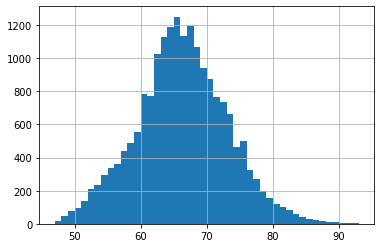

In [ ]:
df['overall'].hist(bins = 46)

También pueden interesarnos las distribuciones de otras habilidades

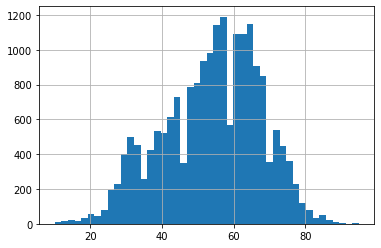

In [ ]:
df['mentality_vision'].hist(bins = 46)

Veamos ahora cual es el mejor jugador en cada posición. 

In [ ]:
best_players_per_position=df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position','short_name','overall']]
best_players_per_position

,club_position,short_name,overall
28,CAM,Bruno Fernandes,88
84,CB,S. de Vrij,85
14,CDM,Casemiro,89
11,CF,K. Benzema,89
219,CM,I. Gueye,82
5,GK,J. Oblak,91
373,LAM,C. Nkunku,81
42,LB,A. Robertson,87
15,LCB,V. van Dijk,89
24,LCM,T. Kroos,88


¿Cuántos jugadores hay registrados por cada posición?

In [ ]:
pd.DataFrame(df.club_position.value_counts().sort_index())

,club_position
CAM,292
CB,186
CDM,168
CF,7
CM,83
GK,701
LAM,21
LB,515
LCB,701
LCM,470


Veamos ahora cuales son los clubes con mejor promedio de Overall sobre sus jugadores.

In [ ]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000


#2. Evaluación visual e intuitiva de a dos variables numéricas por vez.

Hagamos un repaso sobre cuales son las columnas de nuestro dataframe.

In [ ]:
columns = df.columns
print(columns[:99])
print(columns[100:110])

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name',
       'league_name', 'league_level', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'nation_team_id',
       'nation_position', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acce

Ahora, retiramos los jugadores con bajo Overall y reducimos el tamaño del dataset.

Además, seleccionas las variables a tener en cuenta.

In [ ]:
df_n=df[(df['overall']>70)]

n=10000 #cantidad de jugadores a considerar

df_n=df_n.loc[:n] #se reduce la base a los n primeros jugadores

AllColumns = ['sofifa_id', 'player_url', 'short_name', 'long_name',
              'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
              'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name',
              'league_name', 'league_level', 'club_position', 'club_jersey_number',
              'club_loaned_from', 'club_joined', 'club_contract_valid_until',
              'nationality_id', 'nationality_name', 'nation_team_id',
              'nation_position', 'nation_jersey_number', 'preferred_foot',
              'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
              'body_type', 'real_face', 'release_clause_eur', 'player_tags',
              'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
              'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
              'attacking_heading_accuracy', 'attacking_short_passing',
              'attacking_volleys', 'skill_dribbling', 'skill_curve',
              'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
              'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
              'movement_reactions', 'movement_balance', 'power_shot_power',
              'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
              'mentality_aggression', 'mentality_interceptions',
              'mentality_positioning', 'mentality_vision', 'mentality_penalties',
              'mentality_composure', 'defending_marking_awareness',
              'defending_standing_tackle', 'defending_sliding_tackle',
              'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
              'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
              'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
              'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
              'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url',
              'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url']

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling',
                  'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness',
                  'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

41 variables numéricas de desempeño según habilidad


Veamos el dataframe resultante.

In [ ]:
df_skills=df_n[skills_ratings]
df_skills.head(4)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN


Una vez delimitadas las variables a considerar, pasamos a realizar la evaluación visual de los datos, graficando de a dos variables numéricas por vez.

In [ ]:
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[8]

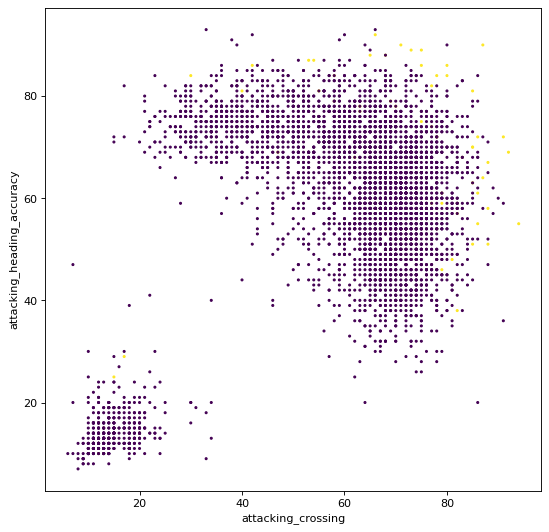

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Generalmente es facil diferenciar a los Arqueros (Goal Keepers) del resto de los jugadores. Sin embargo, entre las demás posiciones no es tan trivial encontrar diferencias en los gráficos. 

Veamos varias comparaciones y distribuciones a la vez

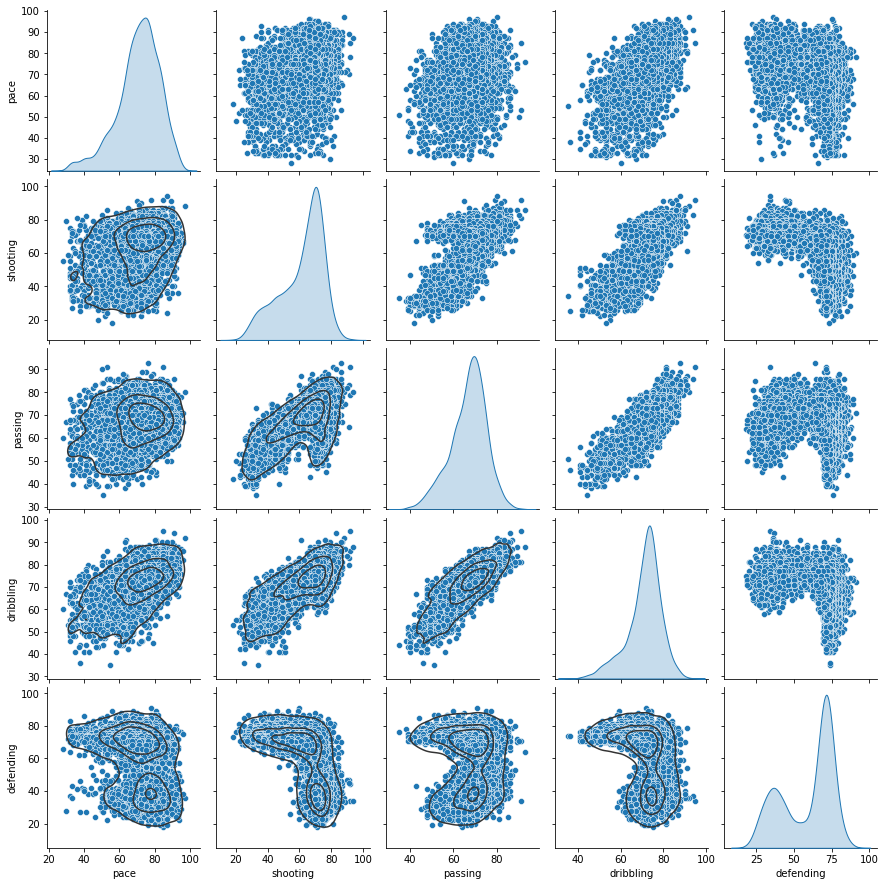

In [ ]:
sns.pairplot(df_skills[skills_ratings[0:5]], diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")

Nuevamente, podemos ver que los arqueros se diferencian claramente del resto

Ahora, para visualizar mejor, agrupamos las posiciones en las 4 principales

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

In [ ]:
def pos2(positions):
    pp = []
    s_positions = positions.split(", ")
    for position in s_positions:
        if position in forwards:
            pp.append('Forward')
    
        elif position in midfielders:
            pp.append('Midfielder')
    
        elif position in defenders:
            pp.append('Defender')
    
        elif position in goalkeepers:
            pp.append('GK')

        else:
            return 'nan'

    return mode(pp)[0][0]

In [ ]:
def posN(positions):
    pp = []
    s_positions = positions.split(", ")
    for position in s_positions:
        if position in forwards:
            pp.append(4)
    
        elif position in midfielders:
            pp.append(3)
    
        elif position in defenders:
            pp.append(2)
    
        elif position in goalkeepers:
            pp.append(1)

        else:
            return 'nan'

    return mode(pp)[0][0]

In [ ]:
df_n["Position2"]=df_n["player_positions"].apply(lambda x: pos2(x))

df_n["Position2"].value_counts()

Defender      1552
Forward       1457
Midfielder    1140
GK             444
Name: Position2, dtype: int64

In [ ]:
df_n["PositionN"]=df_n["player_positions"].apply(lambda x: posN(x))

df_n["PositionN"].value_counts()

2    1552
3    1360
4    1237
1     444
Name: PositionN, dtype: int64

#3. Uso de dos técnicas de clustering. Elección justificada de hiper-parámetros.

## 3.1. Clustering con Kmeans.

Primero definimos el hiperparámetro cantidad de clusters. En este caso, tomaremos 4, correspondientes a las posiciones principales:
- Arquero.
- Defensor.
- Mediocampista.
- Delantero.

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [ ]:
df_skills.fillna(0)
#VER DE IMPUTAR DATOS FALTANTE; POR AHORA RETIRAMOS LAS COLUMNAS PROBLEMATICAS

skills_ratings = ['attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness',
                  'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes']

df_skills=df_skills[skills_ratings]
df_skills.isna().sum()

attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
mentality_composure            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeepin

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  11515484.01471799


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

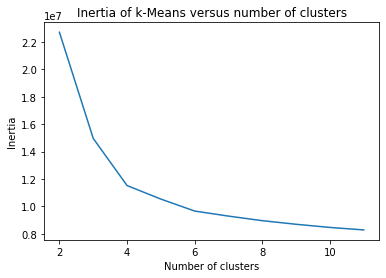

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Como supusimos anteriormente, 4 es un buen número de clusters.

Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez



In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                            text=df_n.loc[:,'short_name'],
                            marker=dict(
                                        size = 4,
                                        color = clusters.astype(np.float), #set color equal to a variable
                                        colorscale='Portland',
                                        showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show(renderer="colab")

Veamos cuantos jugadores de cada posición pertenecen a los clusters encontrados mediante Kmeans en la Tabla de Contingencia

In [ ]:
round(pd.crosstab(clusters,df_n.Position2,margins=True, normalize=True),2)

Position2,Defender,Forward,GK,Midfielder,All
row_0,,,,,
0,0.00,0.28,0.0,0.04,0.32
1,0.00,0.00,0.1,0.00,0.10
2,0.15,0.03,0.0,0.19,0.38
3,0.18,0.00,0.0,0.02,0.20
All,0.34,0.32,0.1,0.25,1.00


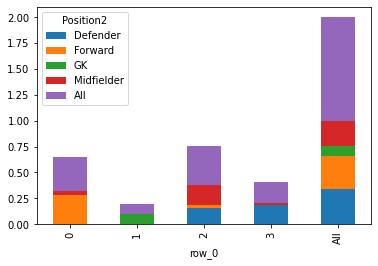

In [ ]:
pd.crosstab(clusters,df_n.Position2,margins=True, normalize=True).plot(kind='bar',stacked=True)

Podemos ver que los clusters encontrados mediante Kmeans separan considerablemente bien arqueros y delanteros. También clasifica generalmente bien a los mediocampistas, pero confunde muchos defensores con mediocampistas.

Veamos los Clusters en un plot 3D

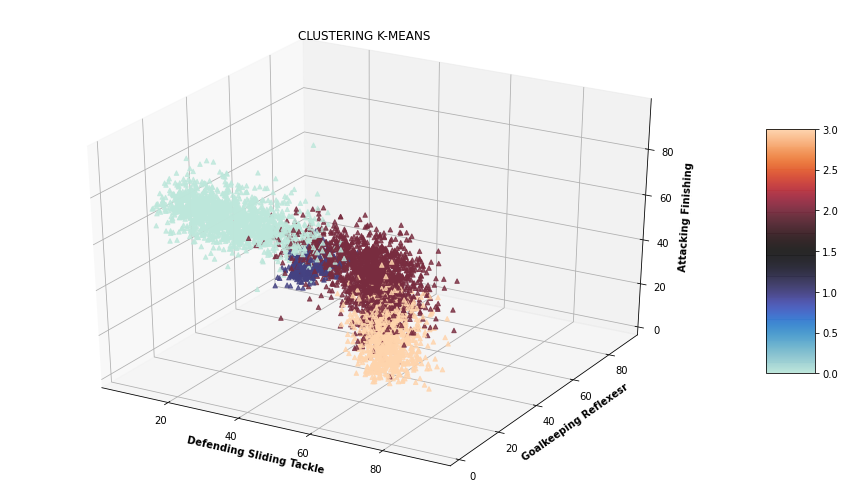

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

z = df_skills['attacking_finishing']
x = df_skills['defending_sliding_tackle']
y = df_skills['goalkeeping_reflexes']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = clusters.astype(np.float),
                    cmap = 'icefire',
                    marker ='^')
 
plt.title("CLUSTERING K-MEANS")
ax.set_xlabel('Defending Sliding Tackle', fontweight ='bold')
ax.set_ylabel('Goalkeeping Reflexesr', fontweight ='bold')
ax.set_zlabel('Attacking Finishing', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

## 3.2. Clustering con Mean-Shift.

In [ ]:
ms = MeanShift(bandwidth=15, bin_seeding=True)
#              (bandwidth=None, 
#               seeds=None, 
#               bin_seeding=False, 
#               min_bin_freq=1, 
#               cluster_all=True, 
#               n_jobs=None, 
#               max_iter=300)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4589


La cantidad de clusters resulta excesiva

Graficamos los resultados:

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

Al parecer, Mean-Shift no es un método recomendable para este problema

## 3.3. Clustering con DEBSCAN.

Text(0, 0.5, 'Distance')

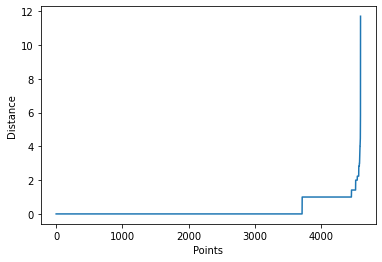

In [ ]:
#BUSCAR EPSILON
k = 2
data_nn = df_skills.copy()[['defending_standing_tackle', 'attacking_finishing']]

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

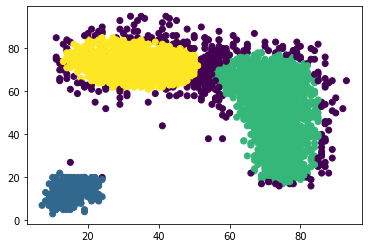

In [ ]:
df_db = df_skills
df_db['dbscan'] = DBSCAN(eps=6, min_samples=200).fit_predict(df_skills[['defending_standing_tackle', 'attacking_finishing']])
plt.scatter(
    df_db['defending_standing_tackle'],
    df_db['attacking_finishing'],
    c = df_db['dbscan']    
)

In [ ]:
df_db['dbscan'].value_counts()

 1    2519
 2    1220
 0     442
-1     412
Name: dbscan, dtype: int64

Se encontraron 4 clusters. Veamos que tam bien se ajustan estos a las posiciones de los jugadores

In [ ]:
round(pd.crosstab(df_db['dbscan'],df_n.Position2,margins=True, normalize=True),2)

Position2,Defender,Forward,GK,Midfielder,All
dbscan,,,,,
-1,0.01,0.05,0.0,0.03,0.09
0,0.00,0.00,0.1,0.00,0.10
1,0.33,0.03,0.0,0.19,0.55
2,0.00,0.24,0.0,0.03,0.27
All,0.34,0.32,0.1,0.25,1.00


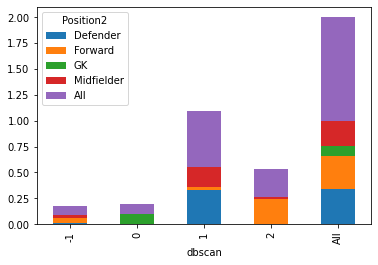

In [ ]:
pd.crosstab(df_db['dbscan'],df_n.Position2,margins=True, normalize=True).plot(kind='bar',stacked=True)

Podemos ver que los clusters encontrados mediante DEBSCAN separan considerablemente bien a los jugadores por sus respectivas posiciones. Nuevamente, resulta dificil separar a los mediocampistas de los defensores.

Veamos los Clusters en un plot 3D

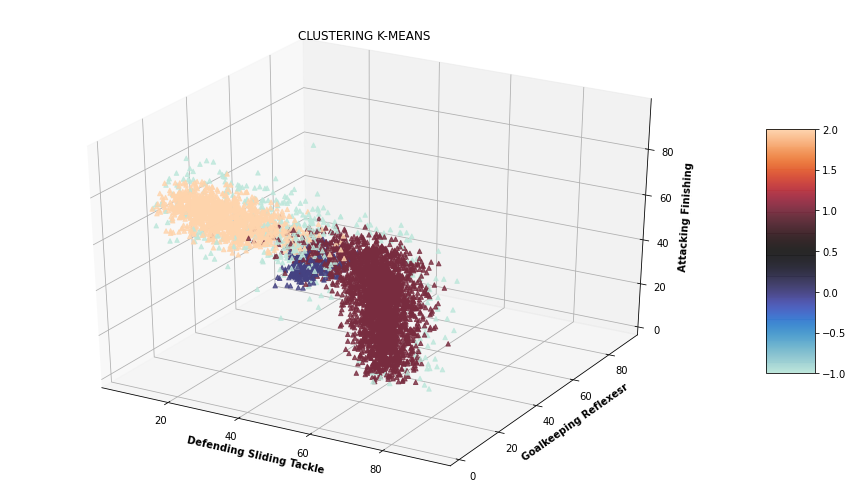

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

z = df_skills['attacking_finishing']
x = df_skills['defending_sliding_tackle']
y = df_skills['goalkeeping_reflexes']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = df_db['dbscan'],
                    cmap = 'icefire',
                    marker ='^')
 
plt.title("CLUSTERING K-MEANS")
ax.set_xlabel('Defending Sliding Tackle', fontweight ='bold')
ax.set_ylabel('Goalkeeping Reflexesr', fontweight ='bold')
ax.set_zlabel('Attacking Finishing', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

#4. Evaluación y Análisis de los clusters encontrados.

*   **Kmeans**

El método del codo nos dio un número óptimo de 4 clusters, coincidiendo con el valor esperado.

Los 4 clusters encontrados tienen una fuerte relación con las posiciones de los jugadores.

1.   Arqueros: Este cluster esta formado exclusivamente por arqueros.
2.   Defensores: Cluster formado principalmente por defensores, con una baja cantidad de mediocampistas.
3.   Mediocampistas-Defensores: Cluster formado a partes iguales por mediocampistas y defensores, con una menor contribución de delanteros.
4.   Delanteros: Cluster formado en mayor medida por delanteros, con una baja concentración de mediocampistas.

*   **Mean-Shift**

El número de clusters encontrados resultó absurdo. Quizá una mejor elección de los hiperparámetros derive en mejores resultados.

*   **DEBSCAN**

El número de clusters encontrados (4) coincide con las posiciones de los jugadores.

1.   Arqueros: Este cluster esta formado exclusivamente por arqueros.
2.   Defensores-Mediocampistas: Cluster formado principalmente por defensores, con una buena cantidad de mediocampistas y algunos pocos delanteros.
3.   Campo: Cluster formado a partes iguales por mediocampistas, defensores y delanteros.
4.   Delanteros: Cluster formado en mayor medida por delanteros, con una baja concentración de mediocampistas.

Considerando estos resultados, Kmeans parece ser el mejor método. 

#5. ¿Se realizó alguna normalización o escalado de la base? ¿Por qué?

No es necesario renormalizar los datos dado que los datos ya vienen normalizados entre 0 y 100.

Si los diferentes atributos del dataset vinieran medidos en escalas distintas (por ejemplo, una habilidad se mide de 0 a 100 mientras que otra se mide de -1 a 1), si sería necesario renormalizar. Esto es así dado que los métodos empleados miden la "distancia" entre datos a partir de estas escalas, por lo que sin importar que tan distintos son los datos en la escala -1, 1, siempre parecerán estar cerca comparados con la escala 0 100.

De todas formas, puede aplicarse alguna normalización. Por ejemplo: dividir todo por 100, con lo que se obtienen valores entre 0 y 1; restar la media y dividir por la varianza; restar el mínimo y dividir por el rango...

Concluimos que no es necesario renormalizar los datos.

#6. Uso de alguna transformación para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

## tSNE

### Visualización

Empleamos tSNE para reducir el número de dimensiones a 2

In [ ]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
df_tsne = tsne.fit_transform(df_skills)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4593 samples in 0.000s...
[t-SNE] Computed neighbors for 4593 samples in 0.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4593
[t-SNE] Computed conditional probabilities for sample 2000 / 4593
[t-SNE] Computed conditional probabilities for sample 3000 / 4593
[t-SNE] Computed conditional probabilities for sample 4000 / 4593
[t-SNE] Computed conditional probabilities for sample 4593 / 4593
[t-SNE] Mean sigma: 14.397763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.929245
[t-SNE] KL divergence after 1000 iterations: 1.788618
t-SNE done! Time elapsed: 39.514347553253174 seconds


Visualizamos el conjunto de datos redimensionalizado

In [ ]:
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=df_tsne[:,0], y=df_tsne[:,1],
                           mode='markers',
                        text=df_n.loc[:,'club_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_tsne[bool_crack,0], y=df_tsne[bool_crack,1],name='Los más mejores',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

Graficamos

In [ ]:
bool_striker= df_n["Position2"] == 'Forward'
bool_midfielder= df_n["Position2"] == 'Midfielder'
bool_defender= df_n["Position2"] == 'Defender'
bool_gk= df_n["Position2"] == 'GK'

bool_crack=df_n["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=df_tsne[bool_striker,0], y=df_tsne[bool_striker,1],name='Striker',
                      text=df_n.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=df_tsne[bool_midfielder,0], y=df_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_n.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=df_tsne[bool_defender,0], y=df_tsne[bool_defender,1],name='Defender',
                      text=df_n.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=df_tsne[bool_gk,0], y=df_tsne[bool_gk,1],name='GK',
                      text=df_n.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=df_tsne[bool_crack,0], y=df_tsne[bool_crack,1],name='Top player',
                      text=df_n.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=750)

fig = go.Figure(data=data, layout=layout)

fig.show(renderer="colab")

### Clustering

In [ ]:
tsne = manifold.TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000)
df_tsne = tsne.fit_transform(df_skills)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4593 samples in 0.001s...
[t-SNE] Computed neighbors for 4593 samples in 0.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4593
[t-SNE] Computed conditional probabilities for sample 2000 / 4593
[t-SNE] Computed conditional probabilities for sample 3000 / 4593
[t-SNE] Computed conditional probabilities for sample 4000 / 4593
[t-SNE] Computed conditional probabilities for sample 4593 / 4593
[t-SNE] Mean sigma: 14.397763
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.182083
[t-SNE] KL divergence after 1000 iterations: 1.553661


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

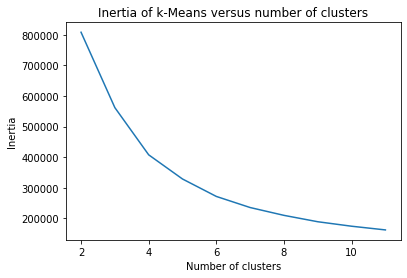

In [ ]:
scores = [KMeans(n_clusters=i).fit(df_tsne).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_tsne) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  407811.9375


Graficamos comparando los clusters encontrados con las posiciones.

A continuación, mostramos 2 graficos. El primero corresponde a los Clusters encontrados por K means. El segundo corresponde a las posiciones reales de los jugadores.

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                            text=df_n.loc[:,'short_name'],
                            marker=dict(
                                        size = 4,
                                        color = clusters.astype(np.float), #set color equal to a variable
                                        colorscale='Portland',
                                        showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                            mode='markers',
                            text=df_n.loc[:,'short_name'],
                            marker=dict(
                                        size = 4,
                                        color = df_n["PositionN"].astype(np.float), #set color equal to a variable
                                        colorscale='Portland',
                                        showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Posiciones Reales ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Podemos ver que ambos gráficos coinciden considerablemente.

Veamos que tanto se ajustan los cluster encontrados a las posiciones reales de los jugadores

In [ ]:
round(pd.crosstab(clusters,df_n.Position2,margins=True, normalize=True),2)

Position2,Defender,Forward,GK,Midfielder,All
row_0,,,,,
0,0.22,0.00,0.0,0.03,0.25
1,0.12,0.03,0.0,0.18,0.32
2,0.00,0.00,0.1,0.00,0.10
3,0.00,0.29,0.0,0.04,0.33
All,0.34,0.32,0.1,0.25,1.00


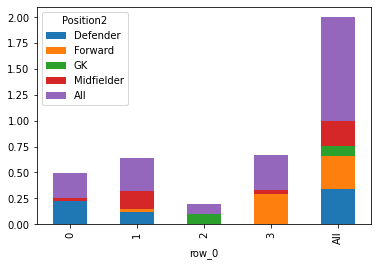

In [ ]:
pd.crosstab(clusters,df_n.Position2,margins=True, normalize=True).plot(kind='bar',stacked=True)

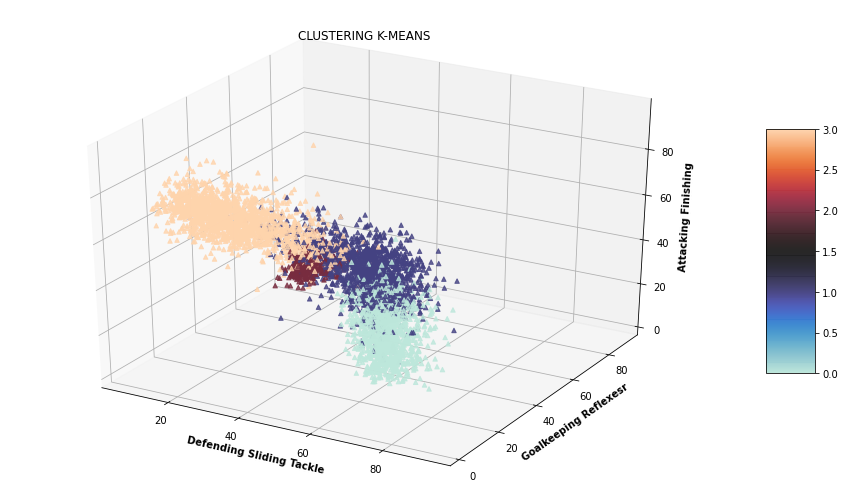

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

z = df_skills['attacking_finishing']
x = df_skills['defending_sliding_tackle']
y = df_skills['goalkeeping_reflexes']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = clusters.astype(np.float),
                    cmap = 'icefire',
                    marker ='^')
 
plt.title("CLUSTERING K-MEANS")
ax.set_xlabel('Defending Sliding Tackle', fontweight ='bold')
ax.set_ylabel('Goalkeeping Reflexesr', fontweight ='bold')
ax.set_zlabel('Attacking Finishing', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

Vemos que los clusters encontrados empleando tSNE no son muy diferentes a los hallados empleando solo Kmeans. Sospechamos que esto puede deberse a la drástica reducción de la dimensionalidad de los datos al emplear tSNE. Pasamos de mas de 40 D a solo 2, siendo que las categorías que intentábamos encontrar eran 4. Una buena reducción de la dimensionalidad de los datos debería resultar en una dimensión mayor o igual a la del target.

Concluimos que la aplicación de métodos de transformación de datos no mejora significativamente los resultados, al menos en el análisis realizado. 